In [ ]:
from zipfile import ZipFile 
  

with ZipFile('smoking_driking_dataset_Ver01.csv.zip', 'r') as zObject: 
    zObject.extractall() 

***Exploratory Data Analysis (EDA)***
---

In [1]:
import math
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')
df.shape

(991346, 24)

In [3]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [4]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [5]:
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

In [6]:

for column in df:
    print(f'{column}: {df[column].unique()}')



sex: ['Male' 'Female']
age: [35 30 40 50 45 55 65 25 60 20 70 75 80 85]
height: [170 180 165 175 150 155 160 145 140 185 135 190 130]
weight: [ 75  80  60  55  65  50  85  70  45  40  95 120  90  35 105 100 110 115
 130  30 125 140  25 135]
waistline: [ 90.   89.   91.   80.   75.   69.   84.2  84.   82.   79.2  98.   72.3
  88.   76.   73.   78.   99.   85.   67.   62.   92.   79.   87.   70.
  67.5  87.3  71.   92.9  94.   79.3  77.   75.7  85.5  74.   60.   81.
  72.   65.   63.   81.6  83.   61.  110.   86.8  73.5  93.  109.   54.
  91.2  66.   79.5  86.   97.1  76.2  80.5  68.   64.   74.1  85.9  65.3
  95.   94.5 100.   85.4  77.6  73.3 103.   93.5  67.8  69.2 105.7 105.
  74.2  97.   75.4  83.2  88.5  85.3  87.4  71.5  64.1  76.6  93.1  84.8
  88.1  66.8  96.   81.5  80.1  87.2  86.5 104.  114.   56.   88.8  89.2
  66.2  90.8  88.2  82.5  65.4  72.2  81.3  75.6  87.8  77.2  98.5  85.2
  97.5  63.5  95.4  72.6 110.8  81.2  87.5  89.5  82.4  81.8  76.5  87.1
  78.1  72.7  84.3 101

In [7]:
df['hearing'] = df.apply(lambda x: 1 if x['hear_left']==1 and x['hear_right']==1 else 2,axis=1)
df.shape

(991346, 25)

Here, in our dataset, there are two columns: hear left and hear right, with values as 1(normal) and 2(abnormal). Now, I have changed these both columns into one column, such that if both left and right hearing is normal, the overall hearing of person is normal, otherwise it is abnormal. I have dropped both hear left and hear right column.

From now on, I will work with respect to this hearing column.

In [8]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,hearing
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y,1
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N,1
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N,1
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N,1
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N,1


In [9]:
df = df.drop(['hear_left','hear_right'],axis=1)

In [10]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,hearing
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,122.432498,76.052627,100.424447,195.557020,...,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122,1.044892
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,14.543148,9.889365,24.179960,38.660155,...,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507,0.207068
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,67.000000,32.000000,25.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,112.000000,70.000000,88.000000,169.000000,...,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,...,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,131.000000,82.000000,105.000000,219.000000,...,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000,1.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,273.000000,185.000000,852.000000,2344.000000,...,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000,2.000000


In [11]:
categorical_columns = ['sex','DRK_YN']
numerical_columns = [col for col in df if df[col].dtype != 'object']

In [12]:
numerical_columns

['age',
 'height',
 'weight',
 'waistline',
 'sight_left',
 'sight_right',
 'SBP',
 'DBP',
 'BLDS',
 'tot_chole',
 'HDL_chole',
 'LDL_chole',
 'triglyceride',
 'hemoglobin',
 'urine_protein',
 'serum_creatinine',
 'SGOT_AST',
 'SGOT_ALT',
 'gamma_GTP',
 'SMK_stat_type_cd',
 'hearing']

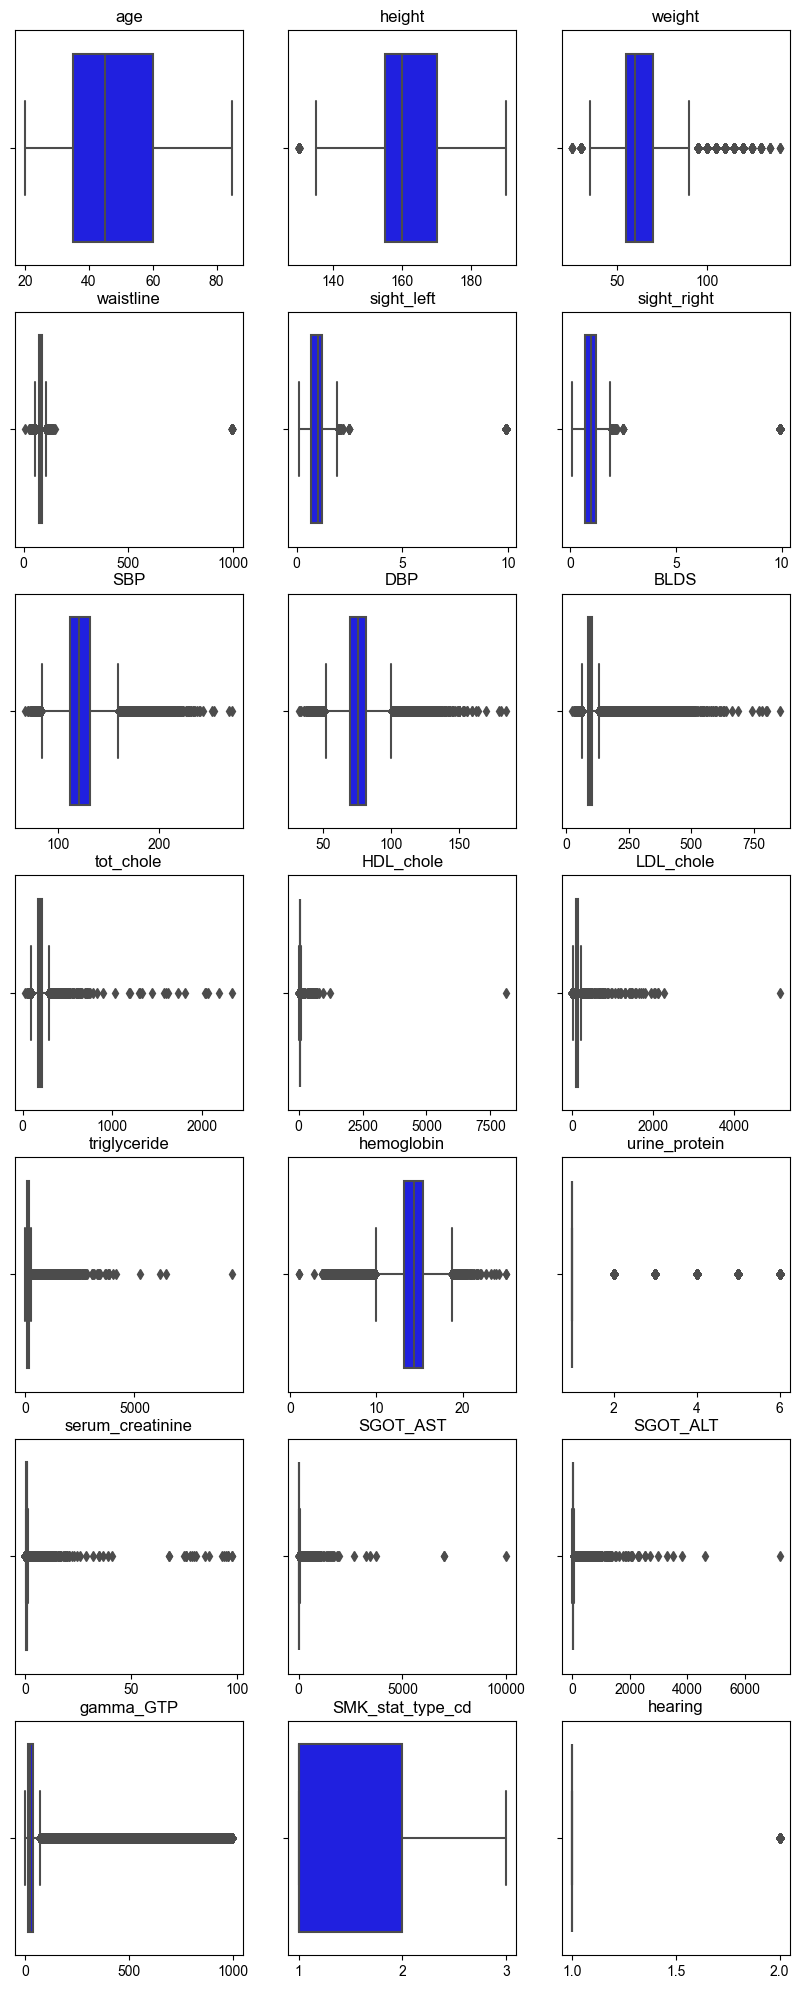

In [13]:
fig, ax=plt.subplots(7,3,figsize=(10,25))
sns.set_theme(style="whitegrid")
count=0
for axid, col in enumerate(numerical_columns):
    
    sns.boxplot(x=df[col],ax = ax[count,axid%3],color='blue')
    ax[count,axid%3].set_title(col)
    ax[count,axid%3].set_xlabel('')
    if axid%3==2:
        count = count+1

From the box plots given above, we can see the outliers for each numerical column, so that we can remove it in pre-processing.

In hearing column, 2 is considered as outlier, but its just 2 values 1 and 2, which we want to predict.

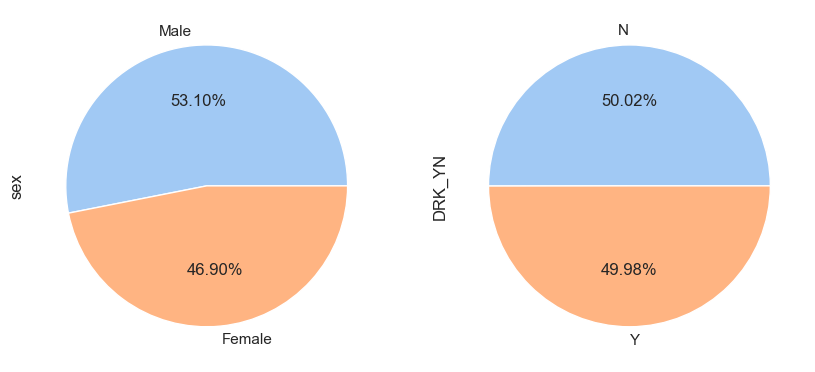

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 20))


for axid, col in enumerate(categorical_columns):
    col_dist = df[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid],label=col)

From the pie charts, it is seen that both the sex and DRK_YN are equally distributed columns.

<Axes: >

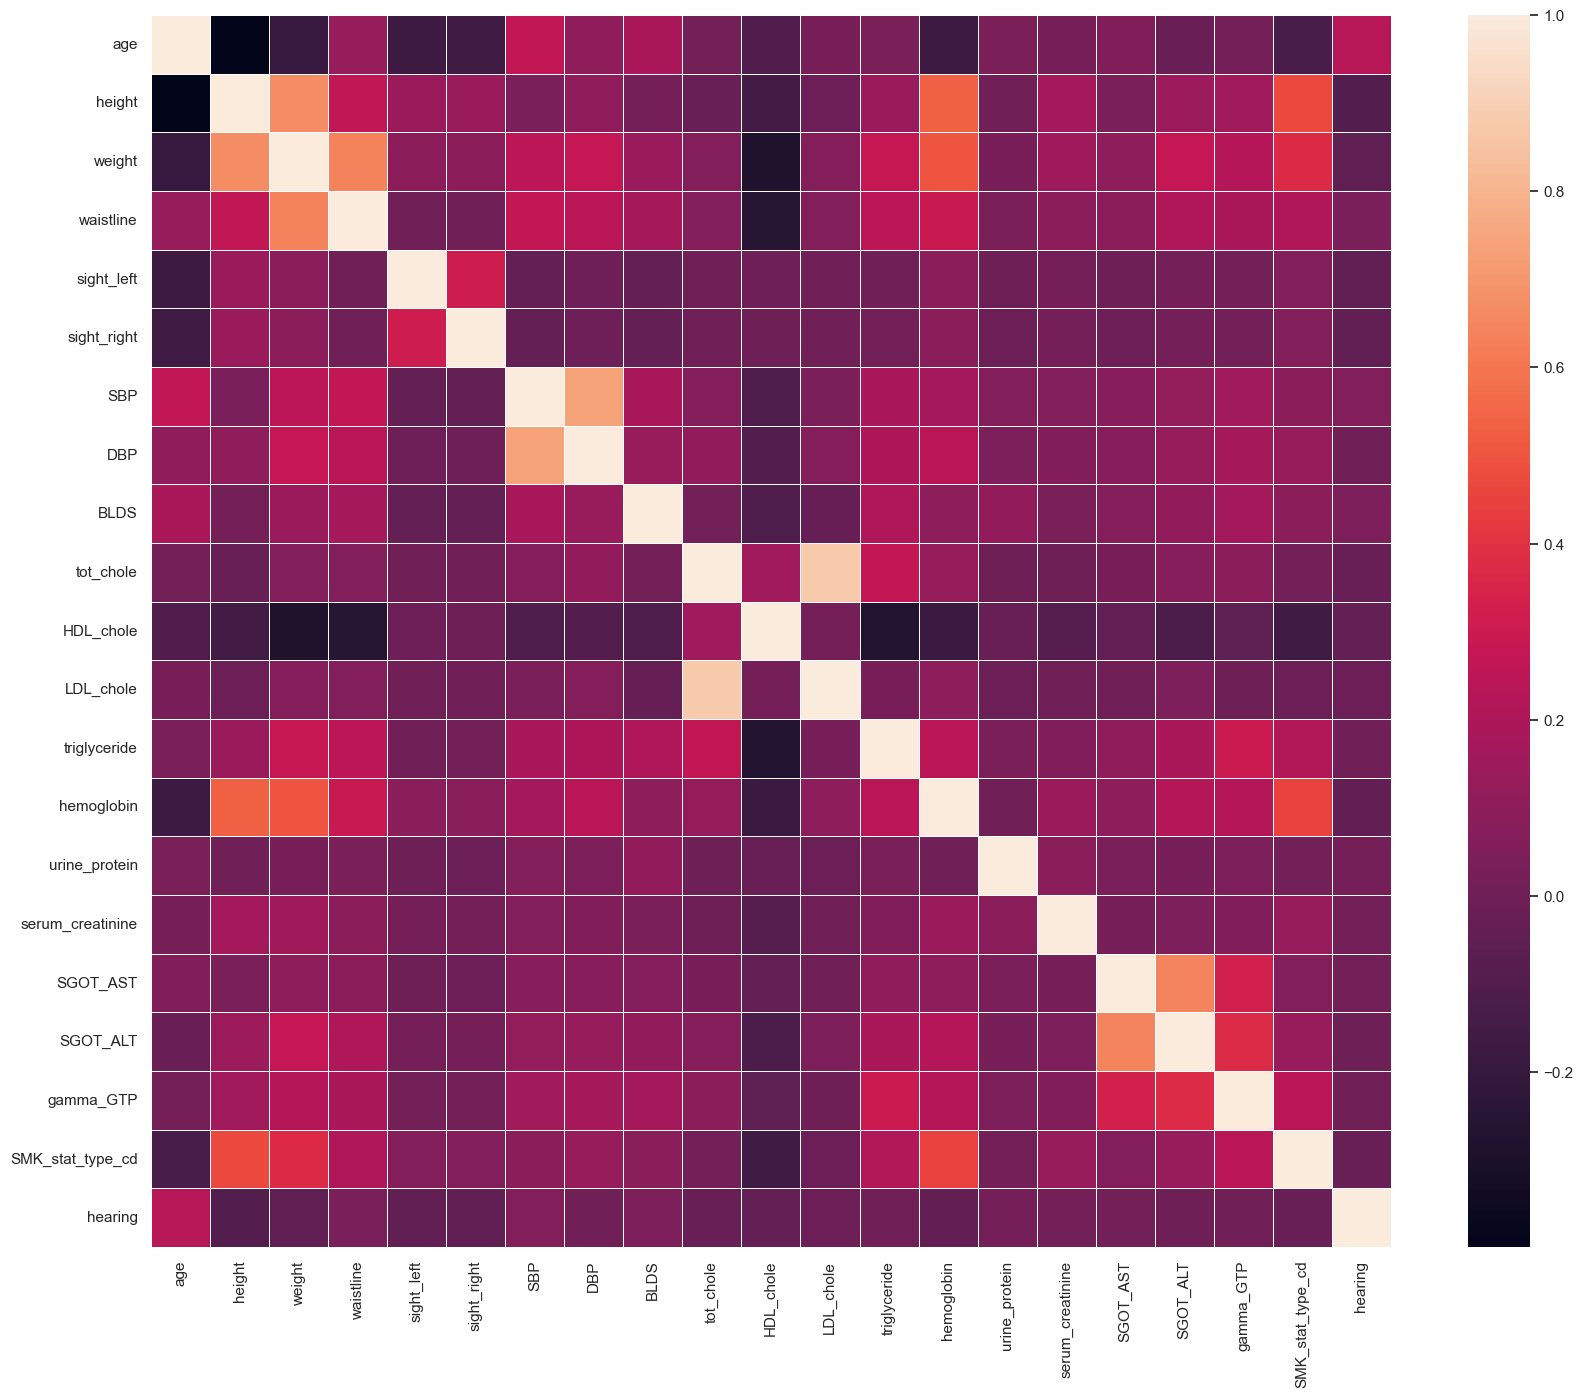

In [15]:
plt.figure(figsize=(20, 16))
sns.heatmap(df[numerical_columns].corr(), linewidths=0.6)

From the heatmap, it is seen that there is no direct or nearer correlation between hearing and any other columns. The 2 significant correlations observed are between SGOT_AST and SGOT_ALT, and LDL_chloe and tot_chloe, and DBP and SBP.

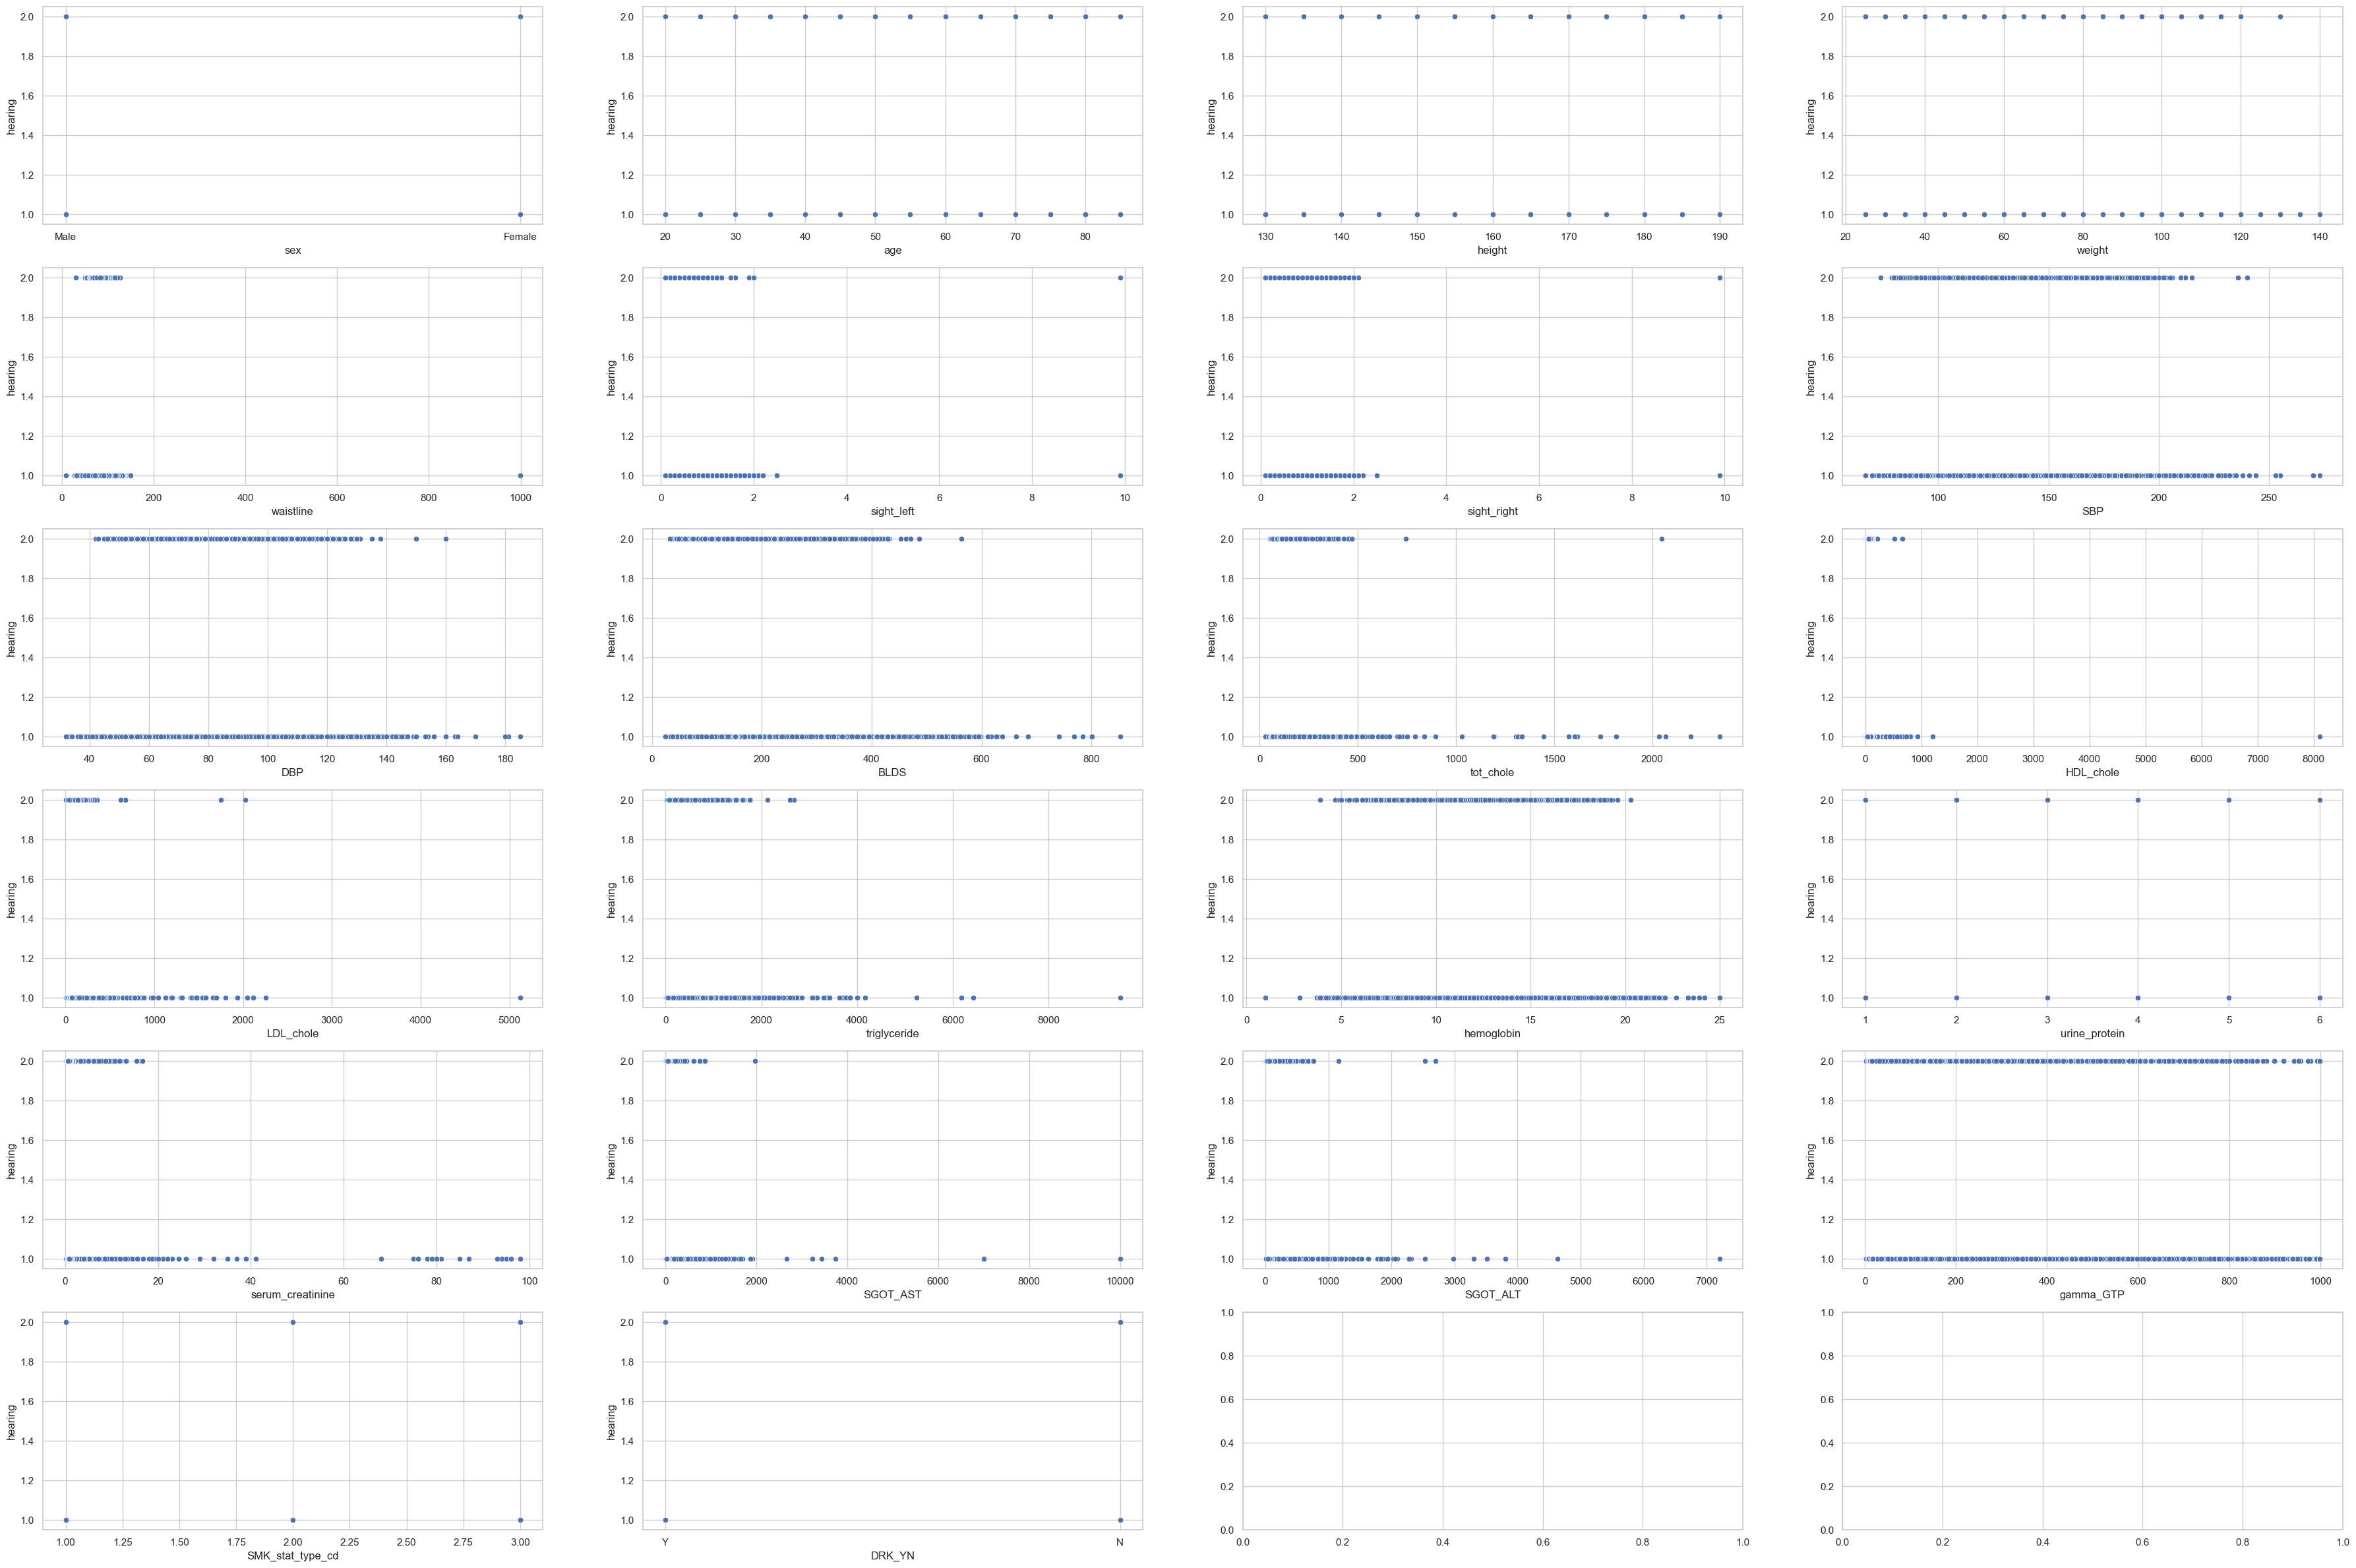

In [16]:
X = df.drop('hearing',axis='columns')
fig, ax=plt.subplots(6,4,figsize=(45,30))
sns.set_theme(style="whitegrid")
count=0
for axid, col in enumerate(X.columns):
    
    sns.scatterplot(x=X[col], y=df['hearing'],ax = ax[count,axid%4])
    if axid%4==3:
        count = count+1

Above given are the scatter plots with remaining 22 columns. The most important result derived from the above scatterplot is that hearing is not linearly dependent on any one column(no direct correlation), on linear separation can be derived.

[Text(0, 0, '946842'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '44504')]

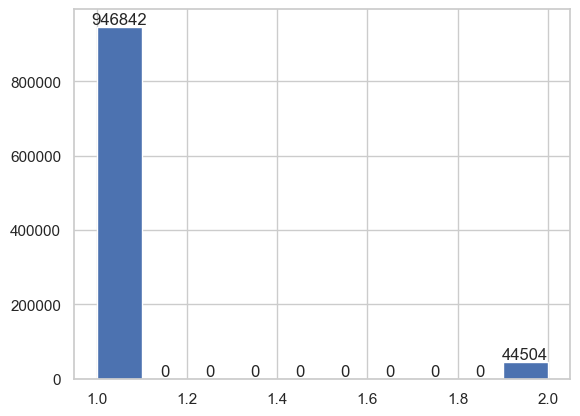

In [ ]:
plt.hist(df['hearing'])
plt.bar_label(bars)

The above barplot of hearing shows that most of the values are normal(946842), with only few as abnormal(44504). There are only two values in hearing column 1 and 2.

In [18]:
df.isnull().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
hearing             0
dtype: int64

There are not any null values in our dataset, so it doesn't require pre-processing in that aspect. 